# Autoeconders with tensorflow

In this Tutorial we will implement various autoencoder architectures on our beloved (Fashion) MNIST data.

In [2]:
import numpy as np
import tensorflow as tf

# import cv as cv2

In [3]:
(x_train, train_label), (x_test, test_label) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# MLP Autoencoders 

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

Using TensorFlow backend.


In [5]:
autoencoder = Model(input_img, decoded)

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               1011

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1437 - val_loss: 0.1331
Epoch 2/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1289 - val_loss: 0.1224
Epoch 3/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1204 - val_loss: 0.1162
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1153 - val_loss: 0.1120
Epoch 5/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1115 - val_loss: 0.1087
Epoch 6/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1082 - val_loss: 0.1059
Epoch 7/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1052 - val_loss: 0.1029
Epoch 8/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1030 - val_loss: 0.1011
Epoch 9/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1012 - val_loss: 0.0995
Epoch

## Filter visualization

NameError: name 'cv2' is not defined

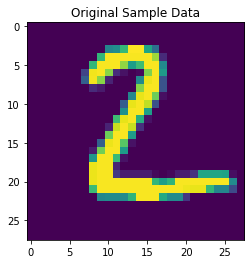

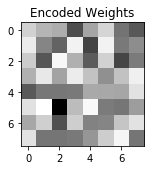

In [17]:
import matplotlib.pyplot as plt
from PIL import *

weights = autoencoder.get_weights()

encodedfeature = np.reshape(weights[3], (8, 8))

plt.title('Original Sample Data')
plt.imshow(x_test[1].reshape(28,28))

fig=plt.figure(figsize=(10, 5))
fig.add_subplot(2, 1, 1)
plt.title('Encoded Weights')
plt.imshow(weights[3].reshape(8, 8), cmap='gray')
c = cv2.filter2D(x_test[1].reshape(28, 28), -1, encodedfeature)
fig.add_subplot(2, 2, 1)
plt.title('Weights over original image')
plt.imshow(c, cmap='gray')
plt.show()

In [18]:
decoded_imgs = autoencoder.predict(x_test)

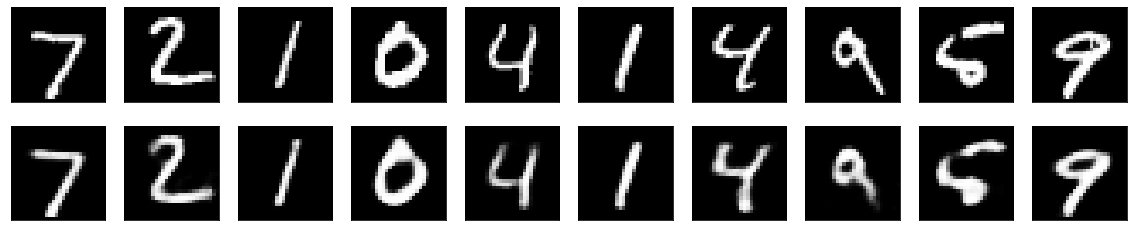

In [19]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoders

In [20]:
from keras.layers import *
from keras.models import Model
# from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


Conv_autoencoder = Model(input_img, decoded)

Conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
Conv_autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [21]:
(x_train, train_label), (x_test, test_label) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format



Run the cells below to see how the output of the model without training

In [101]:
Conv_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2600 - val_loss: 0.1728
Epoch 2/50
60000/60000 [==============================] - 58s 965us/step - loss: 0.1578 - val_loss: 0.1444
Epoch 3/50
60000/60000 [==============================] - 59s 978us/step - loss: 0.1392 - val_loss: 0.1329
Epoch 4/50
60000/60000 [==============================] - 58s 973us/step - loss: 0.1302 - val_loss: 0.1257
Epoch 5/50
60000/60000 [==============================] - 58s 970us/step - loss: 0.1242 - val_loss: 0.1207
Epoch 6/50
60000/60000 [==============================] - 58s 968us/step - loss: 0.1194 - val_loss: 0.1162
Epoch 7/50
60000/60000 [==============================] - 59s 980us/step - loss: 0.1155 - val_loss: 0.1134
Epoch 8/50
60000/60000 [==============================] - 58s 972us/step - loss: 0.1126 - val_loss: 0.1102
Epoch 9/50
60000/60000 [==============================] - 58s 964us/step - loss: 0.1104 - val_lo

In [22]:
decoded_imgs = Conv_autoencoder.predict(x_test)

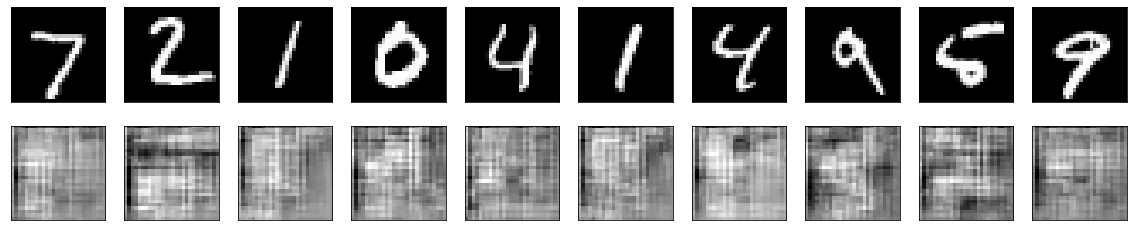

In [23]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
Conv_autoencoder.save('my_model1')

In [95]:
import keras
model = keras.models.load_model('my_model')

# Unsupervised Pretraining 

In [96]:
from keras.layers import *
from keras.models import *

model = keras.models.load_model('my_model')
#Remove Decoder 
[model.layers.pop() for i in range(7, 15)]

model.summary()




Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 8)           584       
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________

C:\Users\you17\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [97]:
#Freeze Model
model.trainables= True


#Make model Sequential
model = keras.Sequential([model])
model.add(Flatten())

model.add(Dense(units=10, activation='softmax'))


In [98]:


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_6 (Model)              (None, 28, 28, 1)         1904      
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 9,754
Trainable params: 9,754
Non-trainable params: 0
_________________________________________________________________


# Training Model with Random 100 samples

In [99]:
(x_train, train_label), (x_test, test_label) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


idx = np.random.randint(6000, size=100)

train_label = np.take(train_label, idx)
x_train = np.take(x_train, idx, axis=0)


(60000, 28, 28, 1)


(100, 28, 28, 1)

In [100]:

model.fit(x_train, train_label,
                epochs=50,
                batch_size=20,
                shuffle=True,
          validation_data=(x_test, test_label))

Train on 100 samples, validate on 10000 samples
Epoch 1/50
100/100 [==============================] - 3s 33ms/step - loss: 2.3153 - accuracy: 0.2300 - val_loss: 2.2314 - val_accuracy: 0.1900
Epoch 2/50
100/100 [==============================] - 3s 31ms/step - loss: 2.0556 - accuracy: 0.3500 - val_loss: 2.0990 - val_accuracy: 0.2907
Epoch 3/50
100/100 [==============================] - 3s 31ms/step - loss: 1.8210 - accuracy: 0.5000 - val_loss: 1.9717 - val_accuracy: 0.3460
Epoch 4/50
100/100 [==============================] - 3s 31ms/step - loss: 1.6173 - accuracy: 0.6500 - val_loss: 1.8057 - val_accuracy: 0.4236
Epoch 5/50
100/100 [==============================] - 3s 32ms/step - loss: 1.4325 - accuracy: 0.7500 - val_loss: 1.6578 - val_accuracy: 0.5085
Epoch 6/50
100/100 [==============================] - 3s 31ms/step - loss: 1.2759 - accuracy: 0.8100 - val_loss: 1.5389 - val_accuracy: 0.5633
Epoch 7/50
100/100 [==============================] - 3s 31ms/step - loss: 1.1241 - accuracy: 

In [108]:

# Define Sequential model
model = keras.Sequential(
    [   
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(8, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(8, (3, 3), activation='relu', padding='same'),
        Flatten(),
        Dense(units=10, activation='softmax')
    ]
)

x = model(Input(shape=(28, 28, 1)))          

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
flatten_12 (Flatten)         (None, 392)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)              

In [109]:

model.fit(x_train, train_label,
                epochs=50,
                batch_size=20,
                shuffle=True,
          validation_data=(x_test, test_label))

Train on 100 samples, validate on 10000 samples
Epoch 1/50
100/100 [==============================] - 1s 15ms/step - loss: 2.3141 - accuracy: 0.0300 - val_loss: 2.2991 - val_accuracy: 0.0921
Epoch 2/50
100/100 [==============================] - 1s 12ms/step - loss: 2.2814 - accuracy: 0.1100 - val_loss: 2.2812 - val_accuracy: 0.1281
Epoch 3/50
100/100 [==============================] - 1s 12ms/step - loss: 2.2491 - accuracy: 0.1800 - val_loss: 2.2620 - val_accuracy: 0.1520
Epoch 4/50
100/100 [==============================] - 1s 12ms/step - loss: 2.2136 - accuracy: 0.2400 - val_loss: 2.2366 - val_accuracy: 0.1900
Epoch 5/50
100/100 [==============================] - 1s 12ms/step - loss: 2.1601 - accuracy: 0.3000 - val_loss: 2.2050 - val_accuracy: 0.2269
Epoch 6/50
100/100 [==============================] - 1s 13ms/step - loss: 2.0925 - accuracy: 0.3400 - val_loss: 2.1651 - val_accuracy: 0.2771
Epoch 7/50
100/100 [==============================] - 1s 12ms/step - loss: 2.0035 - accuracy: 

1. Transfer learning with same model.trainables = false, validation accurracy =  0.7466
2. Transfer learning with same model.trainables = True, validation accurracy =  0.7396
3. Same Model without transfer learning , validation accuracy = 0.7700

Try a more interesting dataset?